In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression

In [2]:
class CustomLinearRegression:
    def __init__(self, x_data, y_target, lr = 0.01, num_epochs = 1000):
        self.x_data = x_data
        self.y_target = y_target
        self.lr = lr
        self.num_epochs = num_epochs
    
        #initialize matrix weight
        self.__theta = np.random.randn(self.x_data.shape[1],1)
        self.loss = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred - y_target).T.dot((y_pred - y_target))/len(y_target)
        return loss.item()
    
    def predict(self, x_data):
        y_pred = np.dot(x_data, self.__theta)
        return y_pred
    
    def compute_gradient(self, x_data, y_pred, y_data):
        grad = 2*x_data.T.dot((y_pred-y_data))/len(y_pred)
        return grad
    
    def fit(self):
        for epoch in range(self.num_epochs):
            y_pred = self.predict(self.x_data)
            loss = self.compute_loss(y_pred, self.y_target)
            grad = self.compute_gradient(self.x_data, y_pred, self.y_target)
            self.loss.append(loss)
            self.__theta = self.__theta - self.lr*grad
            if epoch%50 == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')
        return {'Loss': sum(self.loss)/len(self.loss),
                'Weight': self.__theta}
    
    def r2score(self):
        y_pred = self.predict(self.x_data)
        rss = sum((self.y_target - y_pred)**2)
        tss = sum((self.y_target - self.y_target.mean())**2)
        return 1 - rss/tss
    

In [3]:
def r2score(y_pred, y):
    rss = sum((y - y_pred)**2)
    tss = sum((y - y.mean())**2)
    return 1- rss/tss

In [4]:
y_pred = np. array ([1 , 2, 3, 4, 5])
y = np. array ([3 , 5, 5, 2, 4])
r2score (y_pred , y)


np.float64(-2.235294117647059)

## process data

In [5]:
import numpy as np
import pandas as pd
df = pd.read_csv("data/SalesPrediction.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
null_counts = df.isnull().sum()
null_counts

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [8]:
# mục đích là để có thể lọc được các giá trị chữ của hệ thống
df = pd.get_dummies(df)


In [9]:
df.fillna(df.mean(), inplace=True)
null_counts = df.isnull().sum()
null_counts

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [10]:
df.corr() # mục đích dùng để xem các biến có mức độ tuyến tính với hệ thống hay không?????

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


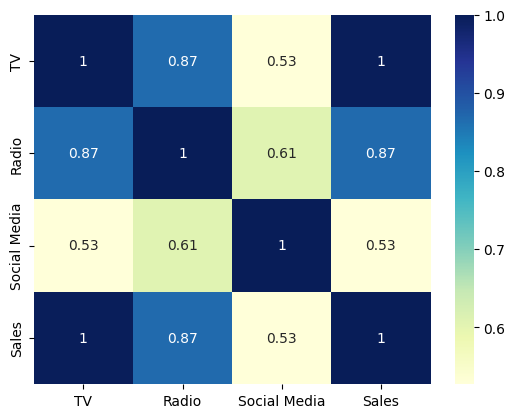

In [11]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap= 'YlGnBu', annot=True)
plt.show()


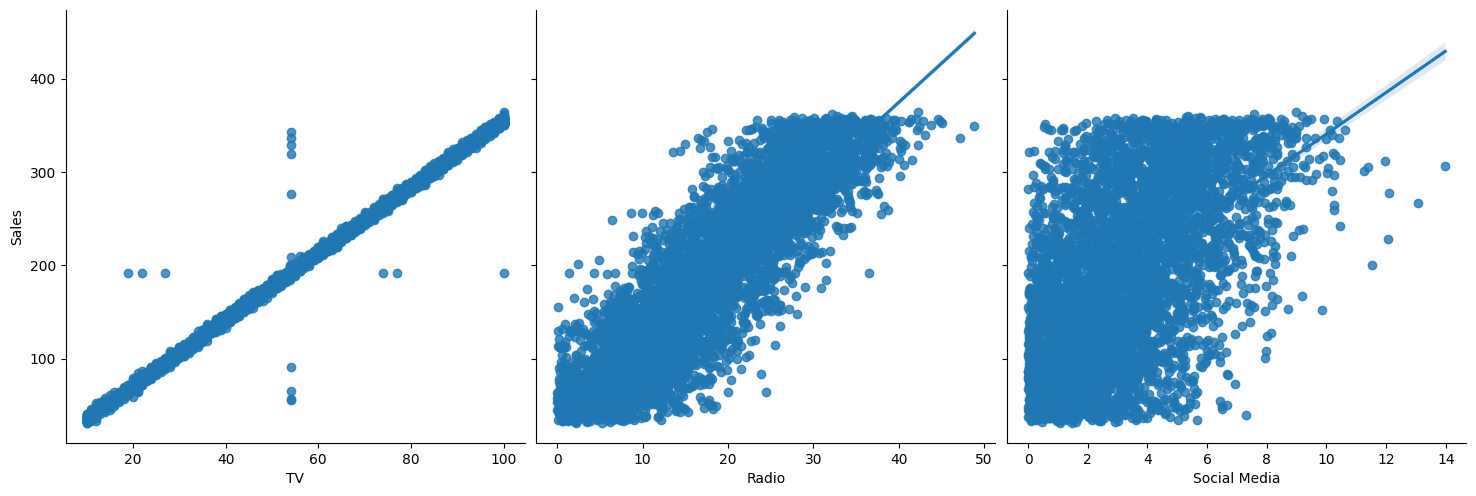

In [12]:
sns.pairplot(data=df, 
             x_vars=['TV', 'Radio', 'Social Media'],
             y_vars= 'Sales',
             height=5,
             kind='reg')

# mục địch của việc này là gì? là để xem được đồ thì và để biết được sự tương quan giữa các đặc tính

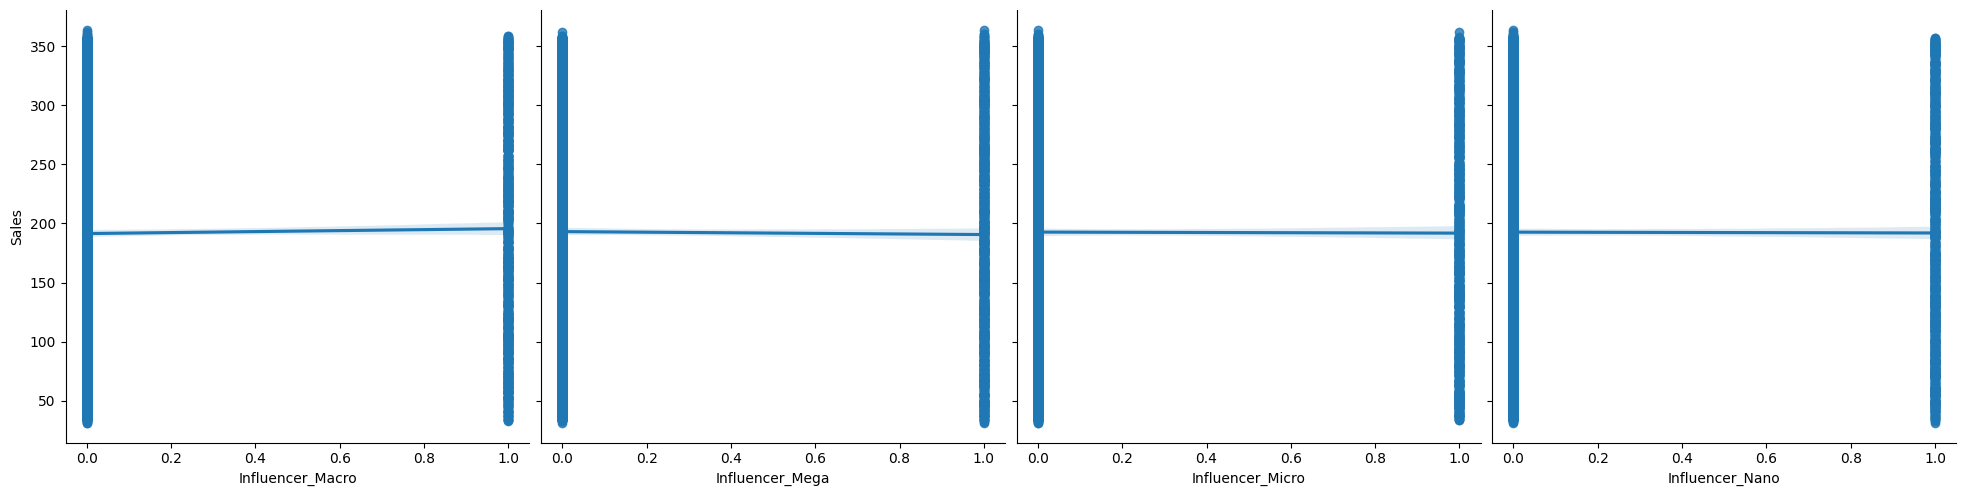

In [13]:
sns.pairplot(data=df, 
             x_vars=['Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
             y_vars= 'Sales',
             height=5,
             kind='reg')

In [14]:
## điều này cho thấy không có mối tương qua nào giữa sales và các đặc tính false and True này

In [28]:
x_data = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro','Influencer_Nano']] 
y_data = df[['Sales']].to_numpy()


In [29]:
# chuẩn hóa dữ liệu cần tính
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=0)
scaler = StandardScaler()
x_train_processed = scaler.fit_transform(x_train)
x_test_processed = scaler.transform(x_test)


In [30]:
x_train_processed_bias = np.insert(x_train_processed,0,1,axis=1)
x_test_processed_bias = np.insert(x_test_processed,0,1,axis=1)
print(x_train_processed_bias)

[[ 1.          0.33869282 -0.3935435  ... -0.57948652  1.73167391
  -0.57848122]
 [ 1.         -0.19852366 -0.28899849 ...  1.72566569 -0.57747593
  -0.57848122]
 [ 1.         -0.42875929 -1.07436552 ... -0.57948652 -0.57747593
   1.72866459]
 ...
 [ 1.         -1.61831007 -1.72922605 ... -0.57948652 -0.57747593
   1.72866459]
 [ 1.         -0.58224971 -0.91383556 ... -0.57948652  1.73167391
  -0.57848122]
 [ 1.         -1.27295662 -1.45779228 ... -0.57948652  1.73167391
  -0.57848122]]


## run program

In [37]:
linear_model = CustomLinearRegression(x_train_processed_bias, y_train, num_epochs=2000)
linear_model.fit()

Epoch: 0 - Loss: 46701.433368753045
Epoch: 50 - Loss: 5829.163327324548
Epoch: 100 - Loss: 1123.2574244352538
Epoch: 150 - Loss: 407.00078345932826
Epoch: 200 - Loss: 255.75425751117768
Epoch: 250 - Loss: 199.35744123527508
Epoch: 300 - Loss: 166.2620933934221
Epoch: 350 - Loss: 142.8953944007613
Epoch: 400 - Loss: 125.37933465283812
Epoch: 450 - Loss: 111.97150357650372
Epoch: 500 - Loss: 101.62294306978374
Epoch: 550 - Loss: 93.60719877553123
Epoch: 600 - Loss: 87.38859822561952
Epoch: 650 - Loss: 82.5607917667627
Epoch: 700 - Loss: 78.81152263883278
Epoch: 750 - Loss: 75.8994200685651
Epoch: 800 - Loss: 73.63740530840714
Epoch: 850 - Loss: 71.88030225790376
Epoch: 900 - Loss: 70.51538933601817
Epoch: 950 - Loss: 69.45512209750248
Epoch: 1000 - Loss: 68.63150195836116
Epoch: 1050 - Loss: 67.99170948658283
Epoch: 1100 - Loss: 67.49471503000119
Epoch: 1150 - Loss: 67.1086467882667
Epoch: 1200 - Loss: 66.80874665247224
Epoch: 1250 - Loss: 66.57578240784923
Epoch: 1300 - Loss: 66.3948143

{'Loss': 651.3228636380295,
 'Weight': array([[1.92950605e+02],
        [9.08382315e+01],
        [2.05978878e+00],
        [1.43152810e-01],
        [1.82756055e-01],
        [4.14533121e-01],
        [4.10506329e-01],
        [4.00596537e-01]])}

In [40]:
weight = np.array([[1.92950605e+02],
        [9.08319772e+01],
        [2.06086553e+00],
        [1.42833093e-01]])
y_pred = linear_model.predict(x_test_processed_bias)
r2score(y_pred , y_test).item()


0.9952402204575319

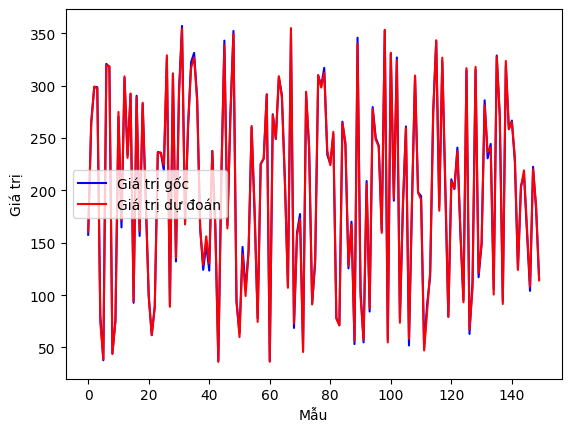

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Vẽ đồ thị đơn giản để kiểm tra
plt.plot(range(len(y_test[:150])), y_test[:150], color='blue', label='Giá trị gốc')
plt.plot(range(len(y_pred[:150])), y_pred[:150], color='red', label='Giá trị dự đoán')

plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

## train data with library

In [53]:
from sklearn.linear_model import LinearRegression
linear_model_lib = LinearRegression()
linear_model_lib.fit(x_train_processed_bias, y_train)
y_pred_poly = linear_model_lib.predict(x_test_processed_bias)
r2score(y_pred, y_test).item()

0.9952402204575319

## Polynomal features

In [54]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train_processed)
x_test_poly = polynomial_features.fit_transform(x_test_processed)
linear_model = CustomLinearRegression(x_train_poly, y_train, num_epochs=2000)
linear_model.fit()
y_pred_poly = linear_model.predict(x_test_poly)
r2score(y_pred_poly, y_test).item()

Epoch: 0 - Loss: 45337.53796980553
Epoch: 50 - Loss: 191.18597473661006
Epoch: 100 - Loss: 120.35829669265405
Epoch: 150 - Loss: 93.70078655892294
Epoch: 200 - Loss: 79.92388649777698
Epoch: 250 - Loss: 72.15919145614725
Epoch: 300 - Loss: 67.54080700034241
Epoch: 350 - Loss: 64.66616514925886
Epoch: 400 - Loss: 62.79692124353053
Epoch: 450 - Loss: 61.52655325316921
Epoch: 500 - Loss: 60.623519651170156
Epoch: 550 - Loss: 59.952187951710656
Epoch: 600 - Loss: 59.43115861524106
Epoch: 650 - Loss: 59.01050983856368
Epoch: 700 - Loss: 58.65899961603568
Epoch: 750 - Loss: 58.356685423499805
Epoch: 800 - Loss: 58.09057715914547
Epoch: 850 - Loss: 57.85203023351658
Epoch: 900 - Loss: 57.63515768786868
Epoch: 950 - Loss: 57.4358494978332
Epoch: 1000 - Loss: 57.251159072848615
Epoch: 1050 - Loss: 57.07891471385551
Epoch: 1100 - Loss: 56.91747050425786
Epoch: 1150 - Loss: 56.76554456435034
Epoch: 1200 - Loss: 56.622112615669764
Epoch: 1250 - Loss: 56.4863369240675
Epoch: 1300 - Loss: 56.3575181

0.9942776550361818

In [71]:
def create_poly_feature(x, degree = 2):
    """ create polymonial features
    arg: x an array of data
        degree is an interger for degree of 
        generated polinomial features
    """
    x_mem = []
    for x_sub in x.T: # lấy từng cột trong tệp x (chuyển các cột thành các hàng x.T)
        x_sub = x_sub.T # chuyển đổi hàng thành một cột
        x_new = x_sub.copy() # lưu x_sub sang biến khác
        for d in range(2, degree+1):
            x_new = np.c_[x_new, np.power(x_sub, d)] # nối các cột lại với nhau
        x_mem.extend(x_new.T) # chuyển các cột thành các hàng và nối lại với nhau
    return np.array(x_mem).T # chuyển đổi các hàng thành các cột
        

In [73]:

a = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
print(a)
b = create_poly_feature(a, 2)
print(b)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[[ 1  1  2  4  3  9  4 16]
 [ 2  4  3  9  4 16  5 25]
 [ 3  9  4 16  5 25  6 36]]


In [76]:
x_train_poly = create_poly_feature(x_train_processed_bias, 2)
print(x_train_poly.shape)
x_test_poly = create_poly_feature(x_test_processed_bias, 2)
print(x_test_poly.shape)
linear_model = CustomLinearRegression(x_train_poly, y_train, num_epochs=1000)
linear_model.fit()
y_pred_poly = linear_model.predict(x_test_poly)
r2score(y_pred_poly, y_test).item()

(3063, 16)
(1509, 16)
Epoch: 0 - Loss: 46822.65648926165
Epoch: 50 - Loss: 1161.4115683781338
Epoch: 100 - Loss: 447.0831313506422
Epoch: 150 - Loss: 304.58351457900574
Epoch: 200 - Loss: 238.69556121949554
Epoch: 250 - Loss: 195.8173059658483
Epoch: 300 - Loss: 165.0904852051333
Epoch: 350 - Loss: 142.2267891085787
Epoch: 400 - Loss: 124.88019742552522
Epoch: 450 - Loss: 111.57632184449969
Epoch: 500 - Loss: 101.3110476354627
Epoch: 550 - Loss: 93.36364614700148
Epoch: 600 - Loss: 87.1992719131387
Epoch: 650 - Loss: 82.41297825698729
Epoch: 700 - Loss: 78.69458185174824
Epoch: 750 - Loss: 75.8049167724892
Epoch: 800 - Loss: 73.55889503140003
Epoch: 850 - Loss: 71.81298633290487
Epoch: 900 - Loss: 70.45576153486687
Epoch: 950 - Loss: 69.40065923875109


0.9946124416464754